In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import io

fobs = '../../offline_data/buoy_bulkwave_met_obs_qc.mat'
obs = io.loadmat(fobs)
buoy_ids = [x[0][0] for x in obs['id']] # Make simple list of ids

In [3]:
fname = '../../offline_data/mlwwcoast_outputs/20211128_u_rmse.npz'
D = np.load(fname)
for k in D.keys():
    print(k)
    
lr_te = D['lr_te']
lr_tr = D['lr_tr']
mr_te = D['mr_te']
mr_tr = D['mr_tr']
ref_te = D['ref_te']
ref_tr = D['ref_tr']
buoys = D['buoys']
hours = D['hours']


lr_te
lr_tr
mr_tr
mr_te
buoys
hours
ref_te
ref_tr


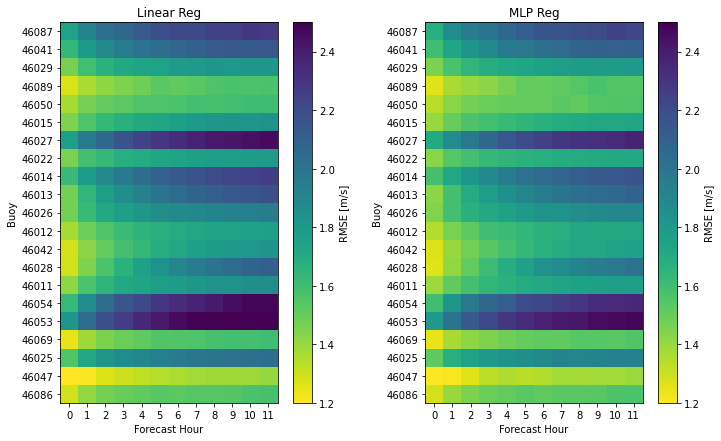

In [4]:
# Absolute RMSE Error
f, axs = plt.subplots(1,2,figsize=(12,7))

def make_plot(ax,var,title):
    plt.sca(ax)
    plt.imshow(var)
    cbar = plt.colorbar()
    cbar.set_label('RMSE [m/s]')
    plt.xlabel('Forecast Hour')
    plt.ylabel('Buoy')
    plt.gca().set_yticks(buoys)
    plt.gca().set_yticklabels(buoy_ids)
    plt.gca().set_xticks(hours)
    plt.set_cmap('viridis_r')
    plt.clim([1.2, 2.5])    
    plt.title(title)

make_plot(axs[0],lr_te,'Linear Reg')
make_plot(axs[1],mr_te,'MLP Reg')
    
#plt.sca(axs[0])


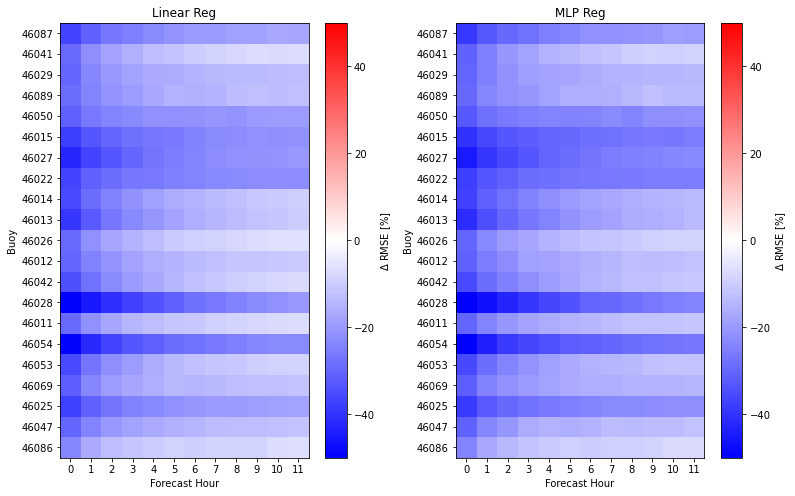

In [5]:
# Relative RMSE error improvement from Weather model
f, axs = plt.subplots(1,2,figsize=(13,8))

def make_rel_plot(ax,var,title):
    plt.sca(ax)
    plt.imshow(var)
    cbar = plt.colorbar()
    cbar.set_label('$\Delta$ RMSE [%]')
    plt.xlabel('Forecast Hour')
    plt.ylabel('Buoy')
    plt.gca().set_yticks(buoys)
    plt.gca().set_yticklabels(buoy_ids)
    plt.gca().set_xticks(hours)
    plt.set_cmap('bwr')
    plt.clim([-50, 50])    
    plt.title(title)

rel_improvement = 100*(lr_te-np.expand_dims(ref_te,axis=1))/np.expand_dims(ref_te,axis=1)
make_rel_plot(axs[0],rel_improvement,'Linear Reg')

rel_improvement = 100*(mr_te-np.expand_dims(ref_te,axis=1))/np.expand_dims(ref_te,axis=1)
make_rel_plot(axs[1],rel_improvement,'MLP Reg')

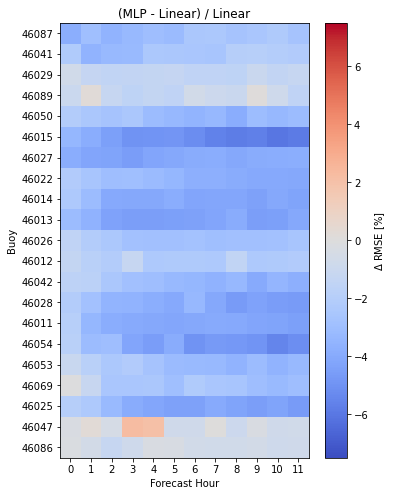

In [6]:
# Compare Linear and MLP regression RMSE
plt.figure(figsize=(6,8))
plt.imshow(100*(mr_te-lr_te)/lr_te)
cbar = plt.colorbar()
cbar.set_label('$\Delta$ RMSE [%]')
plt.xlabel('Forecast Hour')
plt.ylabel('Buoy')
plt.gca().set_yticks(buoys)
plt.gca().set_yticklabels(buoy_ids)
plt.gca().set_xticks(hours)
plt.set_cmap('coolwarm')
plt.clim([-7.5, 7.5])    
plt.title('(MLP - Linear) / Linear')
plt.show()

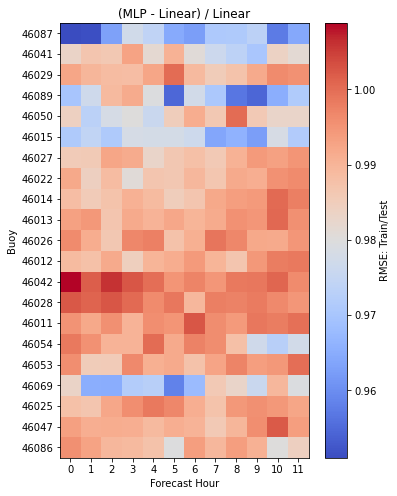

In [11]:
# How overfit are MPL models?
# Plot ratio of train rmse to test rmse
plt.figure(figsize=(6,8))
plt.imshow(mr_tr/mr_te)
cbar = plt.colorbar()
cbar.set_label('RMSE: Train/Test')
plt.xlabel('Forecast Hour')
plt.ylabel('Buoy')
plt.gca().set_yticks(buoys)
plt.gca().set_yticklabels(buoy_ids)
plt.gca().set_xticks(hours)
plt.set_cmap('coolwarm')
#plt.clim([-7.5, 7.5])    
plt.title('(MLP - Linear) / Linear')
plt.show()